In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("PH-Sales.csv")

In [4]:
dataset.head(12)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
5,Jun-03,189
6,Jul-03,207
7,Aug-03,207
8,Sep-03,171
9,Oct-03,150


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
pd.date_range(start='1/1/2018', periods=8)


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [7]:
pd.date_range(start='2022-07-30',periods=7)

DatetimeIndex(['2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', freq='D')

In [8]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

In [9]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [10]:
pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [11]:
dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [12]:
dates.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [13]:
dataset['month']=dates.month
dataset['year']=dates.year

In [14]:
dataset

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [15]:
import calendar
calendar.month_abbr[1]

'Jan'

In [16]:
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_abbr[x])


In [17]:
dataset.head(12)

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003
5,Jun-03,189,Jun,2003
6,Jul-03,207,Jul,2003
7,Aug-03,207,Aug,2003
8,Sep-03,171,Sep,2003
9,Oct-03,150,Oct,2003


In [18]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [19]:
dataset.head()

,Month-Year,Tractor-Sales,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [20]:
dataset.set_index(dates,inplace=True)

In [22]:
dataset=dataset[["Tractor-Sales","month","year"]]

In [23]:
ts_sales=dataset['Tractor-Sales']

<AxesSubplot:>

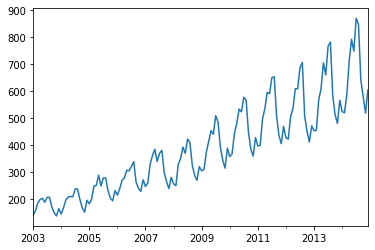

In [24]:
ts_sales.plot()


In [28]:
#decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
decompose=seasonal_decompose(ts_sales)

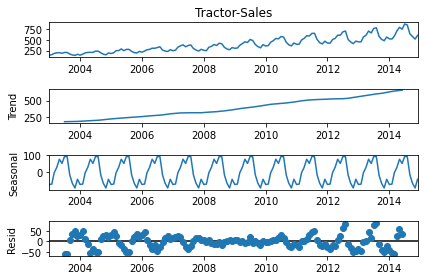

In [30]:
decompose.plot();

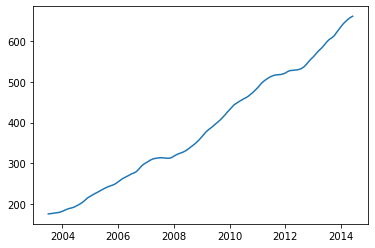

In [31]:
plt.plot(decompose.trend)

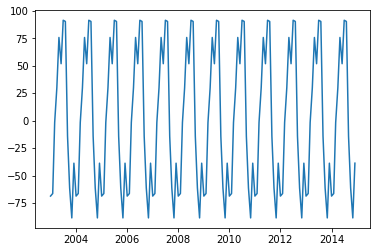

In [32]:
plt.plot(decompose.seasonal)

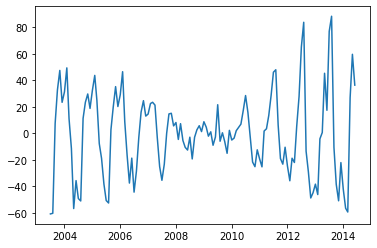

In [33]:
plt.plot(decompose.resid)

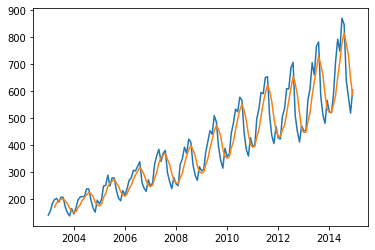

In [34]:
#rolling stats
#simple moving average
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=4).mean())

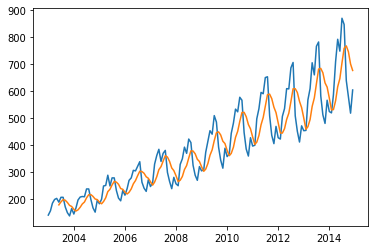

In [35]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=6).mean())

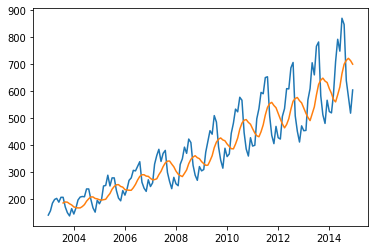

In [36]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=8).mean())

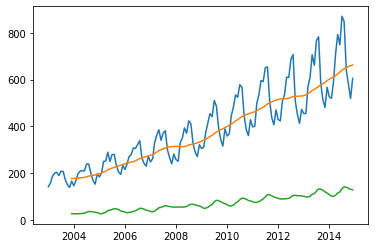

In [37]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=12).mean())
plt.plot(ts_sales.rolling(window=12).std())